SEMINAR 2

Data shape: (1499, 3)
Labels shape: (1499, 1)

Basic statistics for each AP:
               AP1          AP2          AP3
count  1499.000000  1499.000000  1499.000000
mean    -40.845197   -84.082997   -58.676101
std      14.531346     9.959809    15.576462
min     -68.498000  -100.000000   -91.421000
25%     -52.595000   -92.394000   -71.501000
50%     -45.354000   -84.783000   -57.701000
75%     -29.156500   -77.898000   -44.516500
max     -10.000000   -58.915000   -28.238000

Statistics per position:
   position   AP1_mean   AP1_std   AP2_mean   AP2_std   AP3_mean   AP3_std
0         1 -57.547793  3.676167 -68.772187  4.041594 -81.156930  3.748209
1         2 -49.811667  3.892066 -81.979633  3.760133 -68.978473  3.869161
2         3 -46.740827  3.951756 -82.877667  3.981708 -57.633320  4.141495
3         4 -31.584760  4.058027 -91.492630  3.944587 -45.475647  4.102736
4         5 -18.466344  3.862105 -95.330361  3.528179 -40.074127  4.133696


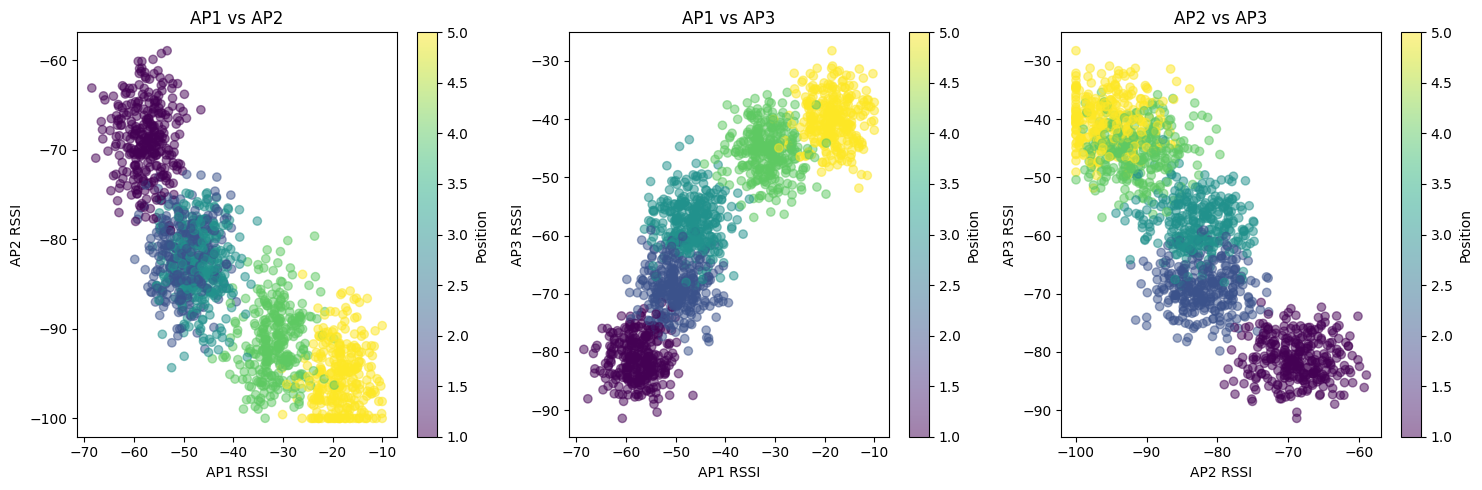

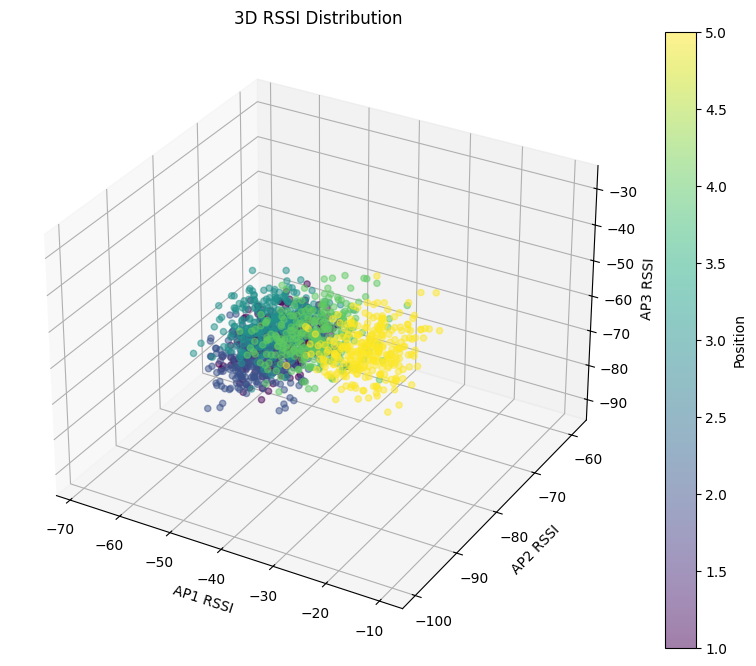

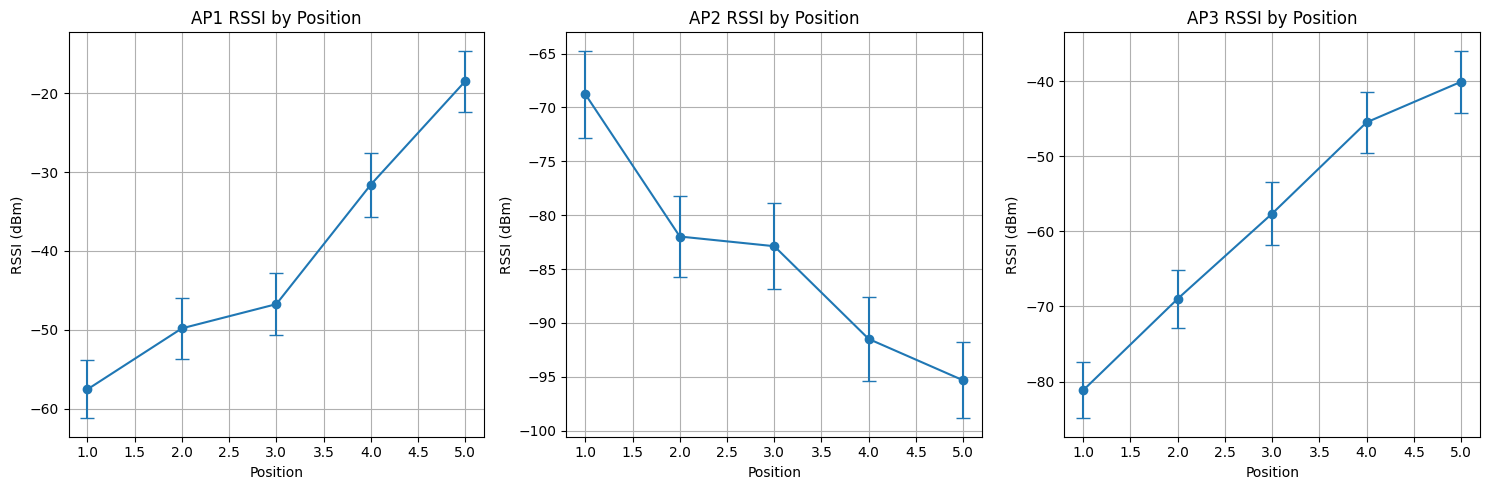

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
data = pd.read_csv('/content/drive/MyDrive/AAX/Semminar 3/rssi_data.csv')
labels = pd.read_csv('/content/drive/MyDrive/AAX/Semminar 3/labels_data.csv')

# Assign column names manually
data.columns = ['AP1', 'AP2', 'AP3']
labels.columns = ['position']

# Check data structure
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

# Basic statistics
print("\nBasic statistics for each AP:")
print(data.describe())

# Calculate mean and std for each position
positions = sorted(labels['position'].unique())
ap_columns = ['AP1', 'AP2', 'AP3']

stats = []
for pos in positions:
    pos_data = data[labels['position'] == pos]
    pos_stats = {
        'position': pos,
        'AP1_mean': pos_data['AP1'].mean(),
        'AP1_std': pos_data['AP1'].std(),
        'AP2_mean': pos_data['AP2'].mean(),
        'AP2_std': pos_data['AP2'].std(),
        'AP3_mean': pos_data['AP3'].mean(),
        'AP3_std': pos_data['AP3'].std()
    }
    stats.append(pos_stats)

stats_df = pd.DataFrame(stats)
print("\nStatistics per position:")
print(stats_df)

# 2D Plots for each AP pair
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(data['AP1'], data['AP2'], c=labels['position'], alpha=0.5)
plt.xlabel('AP1 RSSI')
plt.ylabel('AP2 RSSI')
plt.title('AP1 vs AP2')
plt.colorbar(label='Position')

plt.subplot(1, 3, 2)
plt.scatter(data['AP1'], data['AP3'], c=labels['position'], alpha=0.5)
plt.xlabel('AP1 RSSI')
plt.ylabel('AP3 RSSI')
plt.title('AP1 vs AP3')
plt.colorbar(label='Position')

plt.subplot(1, 3, 3)
plt.scatter(data['AP2'], data['AP3'], c=labels['position'], alpha=0.5)
plt.xlabel('AP2 RSSI')
plt.ylabel('AP3 RSSI')
plt.title('AP2 vs AP3')
plt.colorbar(label='Position')

plt.tight_layout()
plt.show()

# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['AP1'], data['AP2'], data['AP3'],
                    c=labels['position'], alpha=0.5)
ax.set_xlabel('AP1 RSSI')
ax.set_ylabel('AP2 RSSI')
ax.set_zlabel('AP3 RSSI')
ax.set_title('3D RSSI Distribution')
fig.colorbar(scatter, label='Position')

plt.show()

# Plot mean and std for each position
plt.figure(figsize=(15, 5))

for i, ap in enumerate(['AP1', 'AP2', 'AP3']):
    plt.subplot(1, 3, i+1)
    plt.errorbar(positions, stats_df[f'{ap}_mean'],
                 yerr=stats_df[f'{ap}_std'],
                 fmt='o-', capsize=5)
    plt.xlabel('Position')
    plt.ylabel('RSSI (dBm)')
    plt.title(f'{ap} RSSI by Position')
    plt.grid(True)

plt.tight_layout()
plt.show()

Primer, carreguem els fitxers CSV amb les mesures RSSI (data.csv) i les etiquetes de posició (labels_data.csv) utilitzant la llibreria pd, aquests csv només tenen les columnes així que assignem noms a les columnes manualment per facilitar-ne l'ús: les mesures RSSI AP1, AP2 i AP3, mentre que l'etiqueta de posició li posem 'position'. A continuació, calculem estadístics bàsics (mitjana i desviació estàndard) per a cada punt d'accés (AP) en cada posició, agrupant les dades segons les etiquetes amb el .describe. Finalment, generem visualitzacions: gràfics 2D per comparar parells d'APs (amb colors segons la posició), un gràfic 3D que mostra la distribució conjunta dels tres APs, i diagrames d'error que resumeixen la mitjana i variabilitat dels senyals per cada posició.

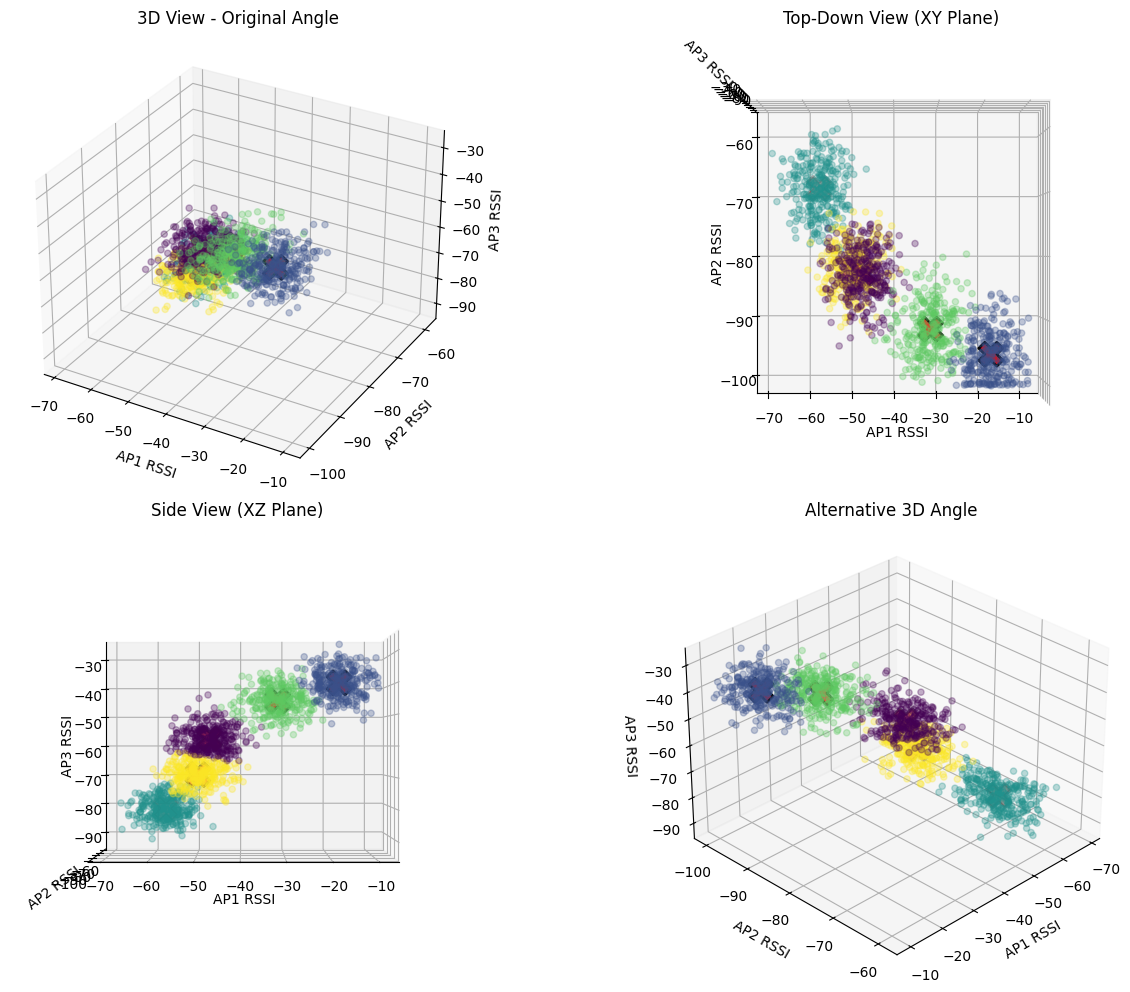

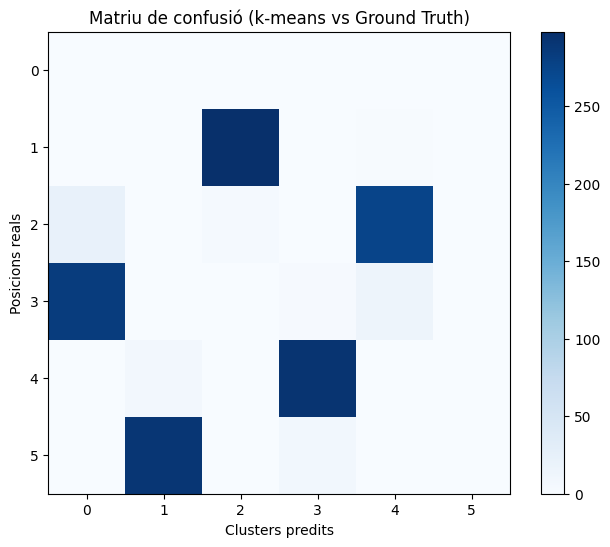

Exactitud: 95.93%


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix, accuracy_score

X = data.values  # Matriu de característiques (RSSI dels 3 APs)
y_true = labels.values.flatten()  # Posicions reals (ground truth)

## Implementació de k-means ##

def kmeans(X, k, max_iters=100):
    # 1. Inicialització aleatòria dels centroides
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # 2. Assignar punts al cluster més proper (distància euclidiana)
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        clusters = np.argmin(distances, axis=0)

        # 3. Actualitzar centroides com a mitjana dels punts del cluster
        new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])

        # 4. Comprovar convergència (si els centroides no canvien)
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids

# Executem k-means
k = 5  # Sabem que hi ha 5 clusters
clusters, centroids = kmeans(X, k)

## Visualització dels resultats ##

# Improved 3D plot with better centroid visibility
fig = plt.figure(figsize=(15, 10))

# Plot 1: Original 3D view
ax1 = fig.add_subplot(221, projection='3d')
sc1 = ax1.scatter(X[:,0], X[:,1], X[:,2], c=clusters, alpha=0.3, s=20)
ax1.scatter(centroids[:,0], centroids[:,1], centroids[:,2],
           c='red', s=300, marker='X', edgecolor='black', linewidth=2)
ax1.set_title('3D View - Original Angle')
ax1.set_xlabel('AP1 RSSI')
ax1.set_ylabel('AP2 RSSI')
ax1.set_zlabel('AP3 RSSI')

# Plot 2: Top-down view (XY plane)
ax2 = fig.add_subplot(222, projection='3d')
sc2 = ax2.scatter(X[:,0], X[:,1], X[:,2], c=clusters, alpha=0.3, s=20)
ax2.scatter(centroids[:,0], centroids[:,1], centroids[:,2],
           c='red', s=300, marker='X', edgecolor='black', linewidth=2)
ax2.view_init(elev=90, azim=-90)  # Top-down view
ax2.set_title('Top-Down View (XY Plane)')
ax2.set_xlabel('AP1 RSSI')
ax2.set_ylabel('AP2 RSSI')
ax2.set_zlabel('AP3 RSSI')

# Plot 3: Side view (XZ plane)
ax3 = fig.add_subplot(223, projection='3d')
sc3 = ax3.scatter(X[:,0], X[:,1], X[:,2], c=clusters, alpha=0.3, s=20)
ax3.scatter(centroids[:,0], centroids[:,1], centroids[:,2],
           c='red', s=300, marker='X', edgecolor='black', linewidth=2)
ax3.view_init(elev=0, azim=-90)  # Side view
ax3.set_title('Side View (XZ Plane)')
ax3.set_xlabel('AP1 RSSI')
ax3.set_ylabel('AP2 RSSI')
ax3.set_zlabel('AP3 RSSI')

# Plot 4: Alternative 3D angle
ax4 = fig.add_subplot(224, projection='3d')
sc4 = ax4.scatter(X[:,0], X[:,1], X[:,2], c=clusters, alpha=0.3, s=20)
ax4.scatter(centroids[:,0], centroids[:,1], centroids[:,2],
           c='red', s=300, marker='X', edgecolor='black', linewidth=2)
ax4.view_init(elev=30, azim=45)  # Alternative angle
ax4.set_title('Alternative 3D Angle')
ax4.set_xlabel('AP1 RSSI')
ax4.set_ylabel('AP2 RSSI')
ax4.set_zlabel('AP3 RSSI')

plt.tight_layout()
plt.show()


# Matriu de confusió per comparar amb ground truth
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix(y_true, clusters), cmap='Blues')
plt.colorbar()
plt.title('Matriu de confusió (k-means vs Ground Truth)')
plt.xlabel('Clusters predits')
plt.ylabel('Posicions reals')
plt.show()

# Exactitud (com que els labels poden estar permutats, cal trobar la millor correspondència)
from scipy.optimize import linear_sum_assignment
conf_mat = confusion_matrix(y_true, clusters)
row_ind, col_ind = linear_sum_assignment(-conf_mat)
accuracy = conf_mat[row_ind, col_ind].sum() / len(y_true)
print(f"Exactitud: {accuracy:.2%}")

Aquest codi implementa l'algoritme k-means per agrupar les mesures en 5 clusters que corresponen a diferents posicions físiques. La funció kmeans() funciona en 4 passos: (1) tria centroides inicials aleatoris, (2) assigna cada punt al centroide més proper calculant distàncies euclidianes, (3) recalcula els centroides com a mitjana dels punts del cluster, i (4) repeteix fins que els centroides deixin de moure's o es completin 100 iteracions tal i com s'indicava al enunciat.

La visualització mostra els resultats des de 4 perspectives diferents. Això es perquè amb una sola visualització no s'apresiaven bé el centroides i les posicions reals. Les quatre vistes consten  d'una vista original, una vista des de dalt (plà XY), una vista lateral (plà XZ) i una altra angle 3D. Els centroides es mostren amb una X vermella. A continuació, la matriu de confusió compara els clusters predits amb les posicions reals, mostrant quantes classificacions són correctes i  calculant el valor d'exactitud.

L'exactitud dona valors porpers al 95% a totes les execucions ixò vol dir que el nostre algoritme és capaç de classificar correctament la posició dels dispositius el 95% de les vegades, comparant amb les posicions reals.

En conclussió els senyals Wi-Fi són bons indicadors de posició: Els valors RSSI dels 3 punts d'accés contenen prou informació per distingir entre les diferents ubicacions i els clusters són ben diferenciats els grups de punts estan clarament separats com veiem al plots on els centroides capturen bé el centre de cada grup.